# Import libraries

In [38]:
%pip install -r requirements.txt
# %pip install wordcloud

  Using cached matplotlib-3.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
INFO: pip is looking at multiple versions of gensim to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install gensim==4.3.3 and numpy==2.2.2 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested numpy==2.2.2
    gensim 4.3.3 depends on numpy<2.0 and >=1.18.5

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/la

In [39]:
# Import standard libraries
import re
import string
import datetime as dt

# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import NLP libraries
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from langdetect import detect
import emoji
from textblob import TextBlob

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Set random seed for reproducibility
seed = 0
np.random.seed(seed)

# Suppress chained assignment warning
pd.options.mode.chained_assignment = None

In [40]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/aditm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/aditm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/aditm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/aditm/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Load dataset

In [41]:
df = pd.read_csv('app_review.csv')

In [42]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,fb1bf82a-f03d-4f7a-b45d-401326b5891f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I'M BACK FOR ""THE HERTA""",5,0,NaN,2025-01-23 22:29:04,NaN,NaN,NaN
1,d877f3d9-5a36-41a7-a264-b5b76bcab9ce,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"L story telling, dev and mihoyo staff pls kys",1,0,NaN,2025-01-23 22:27:01,NaN,NaN,NaN
2,17c2d8dd-dbcb-4737-89b7-4e77aac89095,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Nice game🔥,5,0,3.0.0,2025-01-23 21:48:35,NaN,NaN,3.0.0
3,dc7944ee-30bf-4cd9-9215-1d99aa8053cf,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Just starting copying genshin using black scre...,2,0,3.0.0,2025-01-23 21:26:12,NaN,NaN,3.0.0
4,69a3e4b7-af3d-42e7-ba42-73d1d23aad68,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"The Storytelling is so dragging, slow pace and...",1,0,1.2.0,2025-01-23 21:24:46,NaN,NaN,1.2.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38997 entries, 0 to 38996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              38997 non-null  object
 1   userName              38997 non-null  object
 2   userImage             38997 non-null  object
 3   content               38994 non-null  object
 4   score                 38997 non-null  int64 
 5   thumbsUpCount         38997 non-null  int64 
 6   reviewCreatedVersion  28377 non-null  object
 7   at                    38997 non-null  object
 8   replyContent          2039 non-null   object
 9   repliedAt             2039 non-null   object
 10  appVersion            28377 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.3+ MB


In [44]:
df.shape

(38997, 11)

# Text Preprocessing

## Cleaning data

In [45]:
clean_df = df.dropna(subset=['content'])
clean_df = clean_df.drop_duplicates(subset=['content'])

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35111 entries, 0 to 38996
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              35111 non-null  object
 1   userName              35111 non-null  object
 2   userImage             35111 non-null  object
 3   content               35111 non-null  object
 4   score                 35111 non-null  int64 
 5   thumbsUpCount         35111 non-null  int64 
 6   reviewCreatedVersion  25553 non-null  object
 7   at                    35111 non-null  object
 8   replyContent          2021 non-null   object
 9   repliedAt             2021 non-null   object
 10  appVersion            25553 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.2+ MB


In [46]:
clean_df.shape

(35111, 11)

In [47]:
# Function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove White Space
    text = text.strip()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word, wordnet.VERB) for word in tokens]
    
    # Join tokens back to string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the cleaning function to the 'content' column
clean_df['cleaned_content'] = clean_df['content'].apply(clean_text)

# Display the cleaned data
clean_df[['content', 'cleaned_content']].head()

,content,cleaned_content
0,"I'M BACK FOR ""THE HERTA""",im back herta
1,"L story telling, dev and mihoyo staff pls kys",l story tell dev mihoyo staff pls kys
2,Nice game🔥,nice game
3,Just starting copying genshin using black scre...,start copy genshin use black screen word inste...
4,"The Storytelling is so dragging, slow pace and...",storytelling drag slow pace full yap game does...


In [48]:
clean_df['cleaned_content']

0                                            im back herta
1                    l story tell dev mihoyo staff pls kys
2                                                nice game
3        start copy genshin use black screen word inste...
4        storytelling drag slow pace full yap game does...
                               ...                        
38992                                                     
38993                                       beautiful game
38994                dont mind ill download give first rat
38995                                   soro soro jikan da
38996                                                  omg
Name: cleaned_content, Length: 35111, dtype: object

In [49]:
# check if there is any empty string in the cleaned_content column
clean_df[clean_df['cleaned_content'] == '']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,cleaned_content
218,6c045287-7bdc-4d68-99f6-b28319944810,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,💗,5,0,3.0.0,2025-01-19 17:44:16,NaN,NaN,3.0.0,
255,3309498e-0660-4568-b8ef-e646d2997338,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,🤍🕊,3,0,3.0.0,2025-01-19 05:46:13,NaN,NaN,3.0.0,
346,082d66d5-8909-4090-989f-0a16ac8ca3b4,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,the most,5,0,3.0.0,2025-01-18 00:23:18,NaN,NaN,3.0.0,
444,6ad8cf3a-2c38-48ab-b2ea-8d6d2ccff70e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,3.0 🤩🤩🤩,5,0,2.7.0,2025-01-16 19:26:18,NaN,NaN,2.7.0,
492,98fc4b96-e379-4e9c-80b1-c9f55bcac4fc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,🥰🥰❤️❤️,5,0,NaN,2025-01-16 07:50:45,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
38666,d6df2861-6b03-452a-94ab-6897bec94108,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I am him,5,0,NaN,2023-04-23 10:35:58,NaN,NaN,NaN,
38819,b9900906-2b2c-4270-9c59-ce2e9a5daf2e,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,🏃🏃🏃,5,0,NaN,2023-04-23 10:21:05,NaN,NaN,NaN,
38913,946ba24d-a000-4090-aaa1-9e73664b6a0d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,💖✨,5,0,NaN,2023-04-23 10:15:13,NaN,NaN,NaN,
38920,67c88a93-c6ff-4494-9dd1-2bf5c6d17acc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,🔛🔝,5,0,NaN,2023-04-23 10:14:37,NaN,NaN,NaN,


In [50]:
# drop rows with empty string in the cleaned_content column
clean_df = clean_df[clean_df['cleaned_content'] != '']

In [51]:
from multiprocessing import Pool

# Function to detect language
def detect_lang(text):
    try:
        return detect(text)
    except:
        return "error"

# Function to apply language detection in parallel
def parallel_detect_lang(texts):
    with Pool() as pool:
        return pool.map(detect_lang, texts)

# Apply the parallel language detection to the 'cleaned_content' column
clean_df['lang'] = parallel_detect_lang(clean_df['cleaned_content'])


In [52]:
# Display the result
clean_df[['cleaned_content', 'lang']].head()

,cleaned_content,lang
0,im back herta,de
1,l story tell dev mihoyo staff pls kys,en
2,nice game,pl
3,start copy genshin use black screen word inste...,en
4,storytelling drag slow pace full yap game does...,en


In [53]:
# show the results which is not en
clean_df[clean_df['lang'] != 'en'][['cleaned_content', 'lang']]

,cleaned_content,lang
0,im back herta,de
2,nice game,pl
6,good,so
14,best hoyo game zzz,hu
17,goooooood,so
...,...,...
38984,yeheyy,so
38991,aboard,ro
38993,beautiful game,id
38995,soro soro jikan da,sl


In [54]:
# drop the rows which are not in English
clean_df = clean_df[clean_df['lang'] == 'en']

In [55]:
clean_df.count()

reviewId                24622
userName                24622
userImage               24622
content                 24622
score                   24622
thumbsUpCount           24622
reviewCreatedVersion    18298
at                      24622
replyContent             1664
repliedAt                1664
appVersion              18298
cleaned_content         24622
lang                    24622
dtype: int64

## Text Labelling

In [56]:
# labelling with textblob
from textblob import TextBlob

def sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

def sentiment_subjectivity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.subjectivity

clean_df['sentiment_polarity'] = clean_df['cleaned_content'].apply(sentiment_score)
clean_df['sentiment_subjectivity'] = clean_df['cleaned_content'].apply(sentiment_subjectivity)

def sentiment_label(score):
    if score > 0:
        return 2
    elif score < 0:
        return 0
    else:
        return 1
    
clean_df['sentiment_label'] = clean_df['sentiment_polarity'].apply(sentiment_label)

In [57]:
clean_df[['cleaned_content', 'sentiment_label']]

,cleaned_content,sentiment_label
1,l story tell dev mihoyo staff pls kys,1
3,start copy genshin use black screen word inste...,2
4,storytelling drag slow pace full yap game does...,0
5,still good turnbased game developers become li...,2
8,everything colorism constant waifu pander ew a...,2
...,...,...
38976,finally,1
38977,ohhh shoot,1
38987,iam excite play,1
38988,im ready live experience,2


In [58]:
# count the number of positive, negative and neutral reviews
clean_df['sentiment_label'].value_counts()

sentiment_label
2    13959
0     7974
1     2689
Name: count, dtype: int64

### label exploration

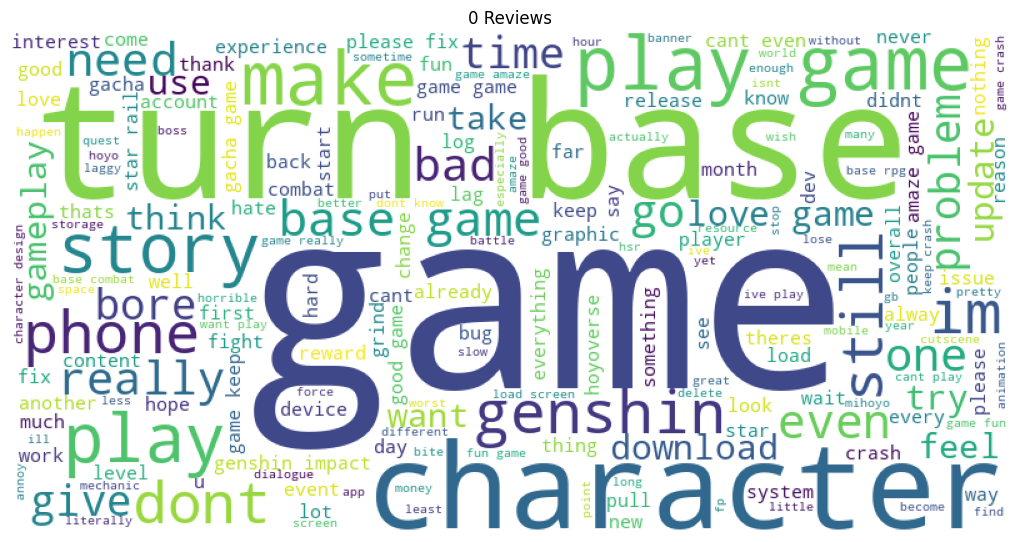

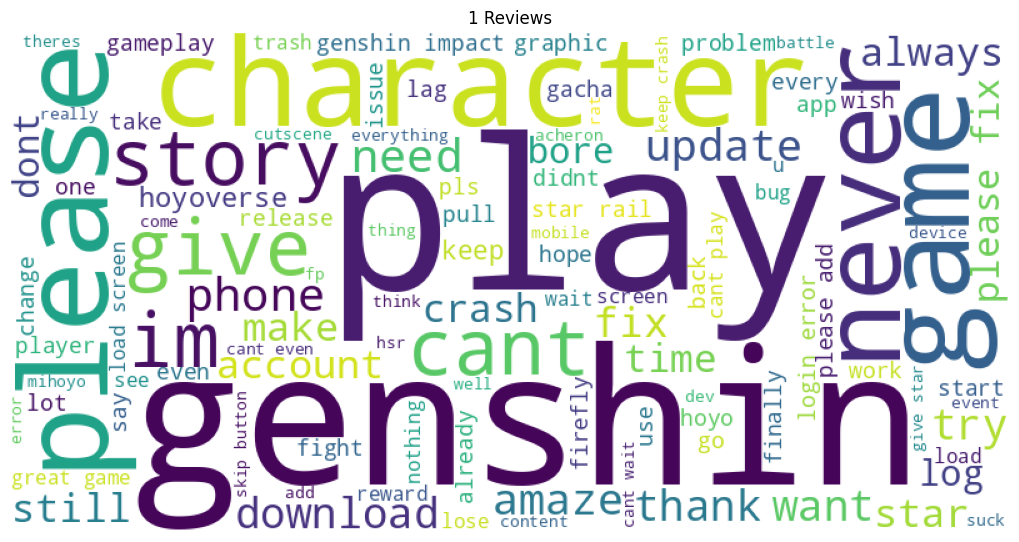

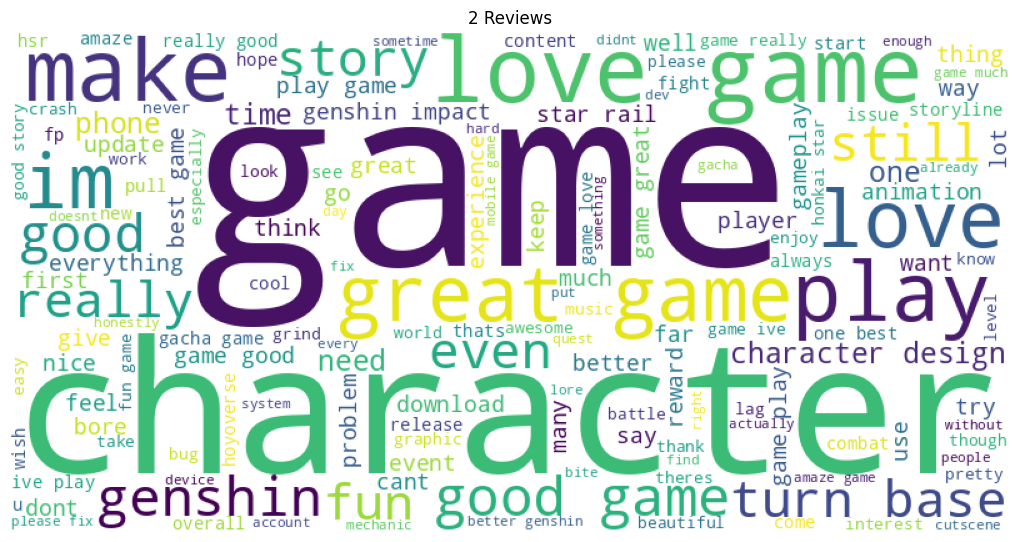

In [59]:
# Word Cloud of each sentiment
from wordcloud import WordCloud

def plot_wordcloud(sentiment):
    text = ' '.join(clean_df[clean_df['sentiment_label'] == sentiment]['cleaned_content'])
    wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                # stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(text)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(f'{sentiment} Reviews')
    plt.show()
    
plot_wordcloud(0)
plot_wordcloud(1)
plot_wordcloud(2)

# Schema 1 : TF-IDF with Random Forest Training

## Feature Extraction

In [60]:
# Insert the data to train the model
X = clean_df['cleaned_content']
y = clean_df['sentiment_label']
 
# Feature extraction
tfidf = TfidfVectorizer(max_features=900, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)
 
# Convert feature extraction result to dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Show the feature extraction
features_df

,able,absolute,absolutely,acc,account,acheron,act,action,actual,actually,...,wrong,yall,yeah,year,years,yes,yet,youll,youre,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

In [61]:
from sklearn.ensemble import RandomForestClassifier
 
# Create a Random Forest model
random_forest = RandomForestClassifier()
 
# Train the model
random_forest.fit(X_train, y_train)
 
# Predict the training and testing data
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)
 
# Calculate the accuracy
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Show the accuracy
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9981215413514748
Random Forest - accuracy_test: 0.8582741116751269


# Schema 2 : TF-IDF with Logistic Regression

## Feature Extraction

In [62]:
# Insert the data to train the model
X = clean_df['cleaned_content']
y = clean_df['sentiment_label']
 
# Feature extraction
tfidf = TfidfVectorizer(max_features=900, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)
 
# Convert feature extraction result to dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Show the feature extraction
features_df

,able,absolute,absolutely,acc,account,acheron,act,action,actual,actually,...,wrong,yall,yeah,year,years,yes,yet,youll,youre,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

In [63]:
from sklearn.linear_model import LogisticRegression
 
# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()
 
# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train, y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)
 
# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
 
# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)
 
# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9322739503477687
Logistic Regression - accuracy_test: 0.9118781725888325


# Schema 3: Bag of Words with Random Forest

## Feature Extraction

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=500, min_df=17, max_df=0.8)
X_bow = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

## Modelling

In [65]:
from sklearn.ensemble import RandomForestClassifier
 
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()
 
# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9951261613443672
Random Forest - accuracy_test: 0.859492385786802


# Schema 4 : TF-IDF with RNN

In [66]:
# Insert the data to train the model
X = clean_df['cleaned_content']
y = clean_df['sentiment_label']
 
# Feature extraction
tfidf = TfidfVectorizer(max_features=900, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)
 
# Convert feature extraction result to dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.2, random_state=42)

# Show the feature extraction
features_df

,able,absolute,absolutely,acc,account,acheron,act,action,actual,actually,...,wrong,yall,yeah,year,years,yes,yet,youll,youre,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1280, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(640, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(320, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(160, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(3, activation='softmax')

])

rnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = rnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

/home/aditm/learning/ml-learning/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4123 - loss: 1.3057 - val_accuracy: 0.5801 - val_loss: 0.9200
Epoch 2/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5440 - loss: 0.9606 - val_accuracy: 0.5801 - val_loss: 0.9099
Epoch 3/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5577 - loss: 0.9312 - val_accuracy: 0.6918 - val_loss: 0.7614
Epoch 4/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6538 - loss: 0.7743 - val_accuracy: 0.7905 - val_loss: 0.5300
Epoch 5/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7561 - loss: 0.6238 - val_accuracy: 0.8057 - val_loss: 0.4740
Epoch 6/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8013 - loss: 0.5286 - val_accuracy: 0.8175 - val_loss: 0.4463
Epoch 7/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8124 - loss: 0.4805 - val_accuracy: 0.8207 - val_loss: 0.4280
Epoch 8/20
616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8224 - loss: 0.4459 - val_accuracy: 

In [68]:
# Evaluate the model
y_pred_train_rnn = np.argmax(rnn_model.predict(X_train), axis=-1)
y_pred_test_rnn = np.argmax(rnn_model.predict(X_test), axis=-1)

accuracy_train_rnn = accuracy_score(y_pred_train_rnn, y_train)
accuracy_test_rnn = accuracy_score(y_pred_test_rnn, y_test)

print('RNN - accuracy_train:', accuracy_train_rnn)
print('RNN - accuracy_test:', accuracy_test_rnn)

# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_rf))


616/616 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
RNN - accuracy_train: 0.9873584809869523
RNN - accuracy_test: 0.9011167512690356
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1559
           1       0.80      0.86      0.83       509
           2       0.88      0.91      0.89      2857

    accuracy                           0.86      4925
   macro avg       0.84      0.85      0.84      4925
weighted avg       0.86      0.86      0.86      4925



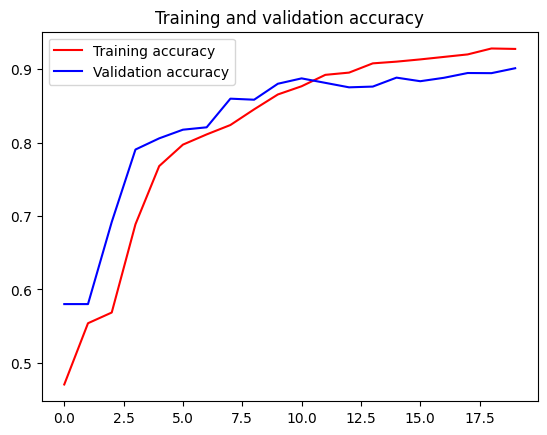

<Figure size 640x480 with 0 Axes>

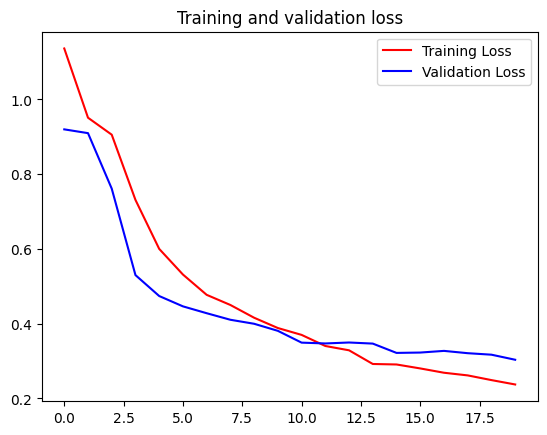

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

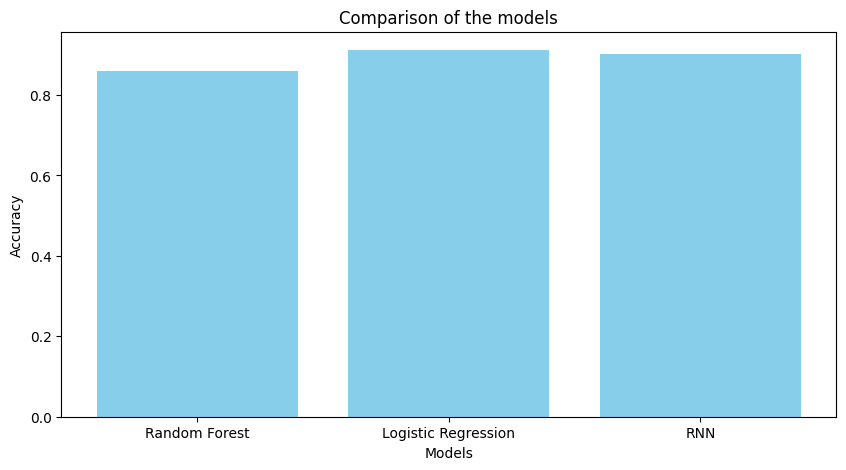

In [70]:
# Comparison of the models with plot
models = ['Random Forest', 'Logistic Regression', 'RNN']
accuracy = [accuracy_test_rf, accuracy_test_lr, accuracy_test_rnn]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of the models')
plt.show()


# Model Testing

In [ ]:
text_test = ['I hate this game so much', 'I love this game','I am so disappointed with this game', 'I am so happy with this game',]
text_test_clean = [clean_text(text) for text in text_test]
text_test_tfidf = tfidf.transform(text_test_clean)
text_test_bow = vectorizer.transform(text_test_clean)

for text, rf_pred, lr_pred, rnn_pred in zip(text_test, random_forest.predict(text_test_bow), logistic_regression.predict(text_test_tfidf), np.argmax(rnn_model.predict(text_test_tfidf), axis=-1)):
    print(f'Text: {text}')
    print(f'Random Forest (BoW) Sentiment: {"Negative" if rf_pred == 0 else "Neutral" if rf_pred == 1 else "Positive"} (Accuracy: {accuracy_test_rf * 100:.2f}%)')
    print(f'Logistic Regression (TF-IDF) Sentiment: {"Negative" if lr_pred == 0 else "Neutral" if lr_pred == 1 else "Positive"} (Accuracy: {accuracy_test_lr * 100:.2f}%)')
    print(f'RNN (TF-IDF) Sentiment: {"Negative" if rnn_pred == 0 else "Neutral" if rnn_pred == 1 else "Positive"} (Accuracy: {accuracy_test_rnn * 100:.2f}%)')
    print()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
Text: I hate this game so much
Random Forest (BoW) Sentiment: Negative (Accuracy: 85.95%)
Logistic Regression (TF-IDF) Sentiment: Negative (Accuracy: 91.19%)
RNN (TF-IDF) Sentiment: Negative (Accuracy: 90.11%)

Text: I love this game
Random Forest (BoW) Sentiment: Positive (Accuracy: 85.95%)
Logistic Regression (TF-IDF) Sentiment: Positive (Accuracy: 91.19%)
RNN (TF-IDF) Sentiment: Positive (Accuracy: 90.11%)

Text: finally a game that is worth playing
Random Forest (BoW) Sentiment: Negative (Accuracy: 85.95%)
Logistic Regression (TF-IDF) Sentiment: Negative (Accuracy: 91.19%)
RNN (TF-IDF) Sentiment: Negative (Accuracy: 90.11%)

Text: I am so disappointed with this game
Random Forest (BoW) Sentiment: Negative (Accuracy: 85.95%)
Logistic Regression (TF-IDF) Sentiment: Negative (Accuracy: 91.19%)
RNN (TF-IDF) Sentiment: Negative (Accuracy: 90.11%)

Text: I am so happy with this game
Random Forest (BoW) Sentiment: Positive (Accuracy: 85.95%)
Logistic